In [1]:
import seaborn as sns
from sklearn.metrics import pairwise

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text  # Imports TF ops for preprocessing.

In [2]:
BERT_MODEL = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4" # @param {type: "string"} ["https://tfhub.dev/google/experts/bert/wiki_books/2", "https://tfhub.dev/google/experts/bert/wiki_books/mnli/2", "https://tfhub.dev/google/experts/bert/wiki_books/qnli/2", "https://tfhub.dev/google/experts/bert/wiki_books/qqp/2", "https://tfhub.dev/google/experts/bert/wiki_books/squad2/2", "https://tfhub.dev/google/experts/bert/wiki_books/sst2/2",  "https://tfhub.dev/google/experts/bert/pubmed/2", "https://tfhub.dev/google/experts/bert/pubmed/squad2/2"]
# Preprocessing must match the model, but all the above use the same.
PREPROCESS_MODEL = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

In [3]:
sentences = [
  "Here We Go Then, You And I is a 1999 album by Norwegian pop artist Morten Abel. It was Abel's second CD as a solo artist.",
  "The album went straight to number one on the Norwegian album chart, and sold to double platinum.",
  "Among the singles released from the album were the songs \"Be My Lover\" and \"Hard To Stay Awake\".",
  "Riccardo Zegna is an Italian jazz musician.",
  "Rajko Maksimović is a composer, writer, and music pedagogue.",
  "One of the most significant Serbian composers of our time, Maksimović has been and remains active in creating works for different ensembles.",
  "Ceylon spinach is a common name for several plants and may refer to: Basella alba Talinum fruticosum",
  "A solar eclipse occurs when the Moon passes between Earth and the Sun, thereby totally or partly obscuring the image of the Sun for a viewer on Earth.",
  "A partial solar eclipse occurs in the polar regions of the Earth when the center of the Moon's shadow misses the Earth.",
]

In [3]:
preprocess = hub.load(PREPROCESS_MODEL)
bert = hub.load(BERT_MODEL)

In [5]:
inputs = preprocess(sentences)
outputs = bert(inputs)

NameError: name 'sentences' is not defined

In [6]:
model_ans = "Narendra Modi is the prime minister of India"
ans = "Narendra Modi is not the prime minister of India"

model_ans_embed = bert(preprocess([model_ans]))["pooled_output"]
ans_embed = bert(preprocess([ans]))["pooled_output"]

cosine_sim = pairwise.cosine_similarity(model_ans_embed, ans_embed)

print(cosine_sim[0])

[0.90964794]


In [6]:
print("Sentences:")
print(sentences)

print("\nBERT inputs:")
print(inputs)

print("\nPooled embeddings:")
print(outputs["pooled_output"])

print("\nPer token embeddings:")
print(outputs["sequence_output"])

Sentences:
["Here We Go Then, You And I is a 1999 album by Norwegian pop artist Morten Abel. It was Abel's second CD as a solo artist.", 'The album went straight to number one on the Norwegian album chart, and sold to double platinum.', 'Among the singles released from the album were the songs "Be My Lover" and "Hard To Stay Awake".', 'Riccardo Zegna is an Italian jazz musician.', 'Rajko Maksimović is a composer, writer, and music pedagogue.', 'One of the most significant Serbian composers of our time, Maksimović has been and remains active in creating works for different ensembles.', 'Ceylon spinach is a common name for several plants and may refer to: Basella alba Talinum fruticosum', 'A solar eclipse occurs when the Moon passes between Earth and the Sun, thereby totally or partly obscuring the image of the Sun for a viewer on Earth.', "A partial solar eclipse occurs in the polar regions of the Earth when the center of the Moon's shadow misses the Earth."]

BERT inputs:
{'input_word_

In [7]:
def plot_similarity(features, labels):
  """Plot a similarity matrix of the embeddings."""
  cos_sim = pairwise.cosine_similarity(features)
  sns.set(font_scale=1.2)
  cbar_kws=dict(use_gridspec=False, location="left")
  g = sns.heatmap(
      cos_sim, xticklabels=labels, yticklabels=labels,
      vmin=0, vmax=1, cmap="Blues", cbar_kws=cbar_kws)
  g.tick_params(labelright=True, labelleft=False)
  g.set_yticklabels(labels, rotation=0)
  g.set_title("Semantic Textual Similarity")

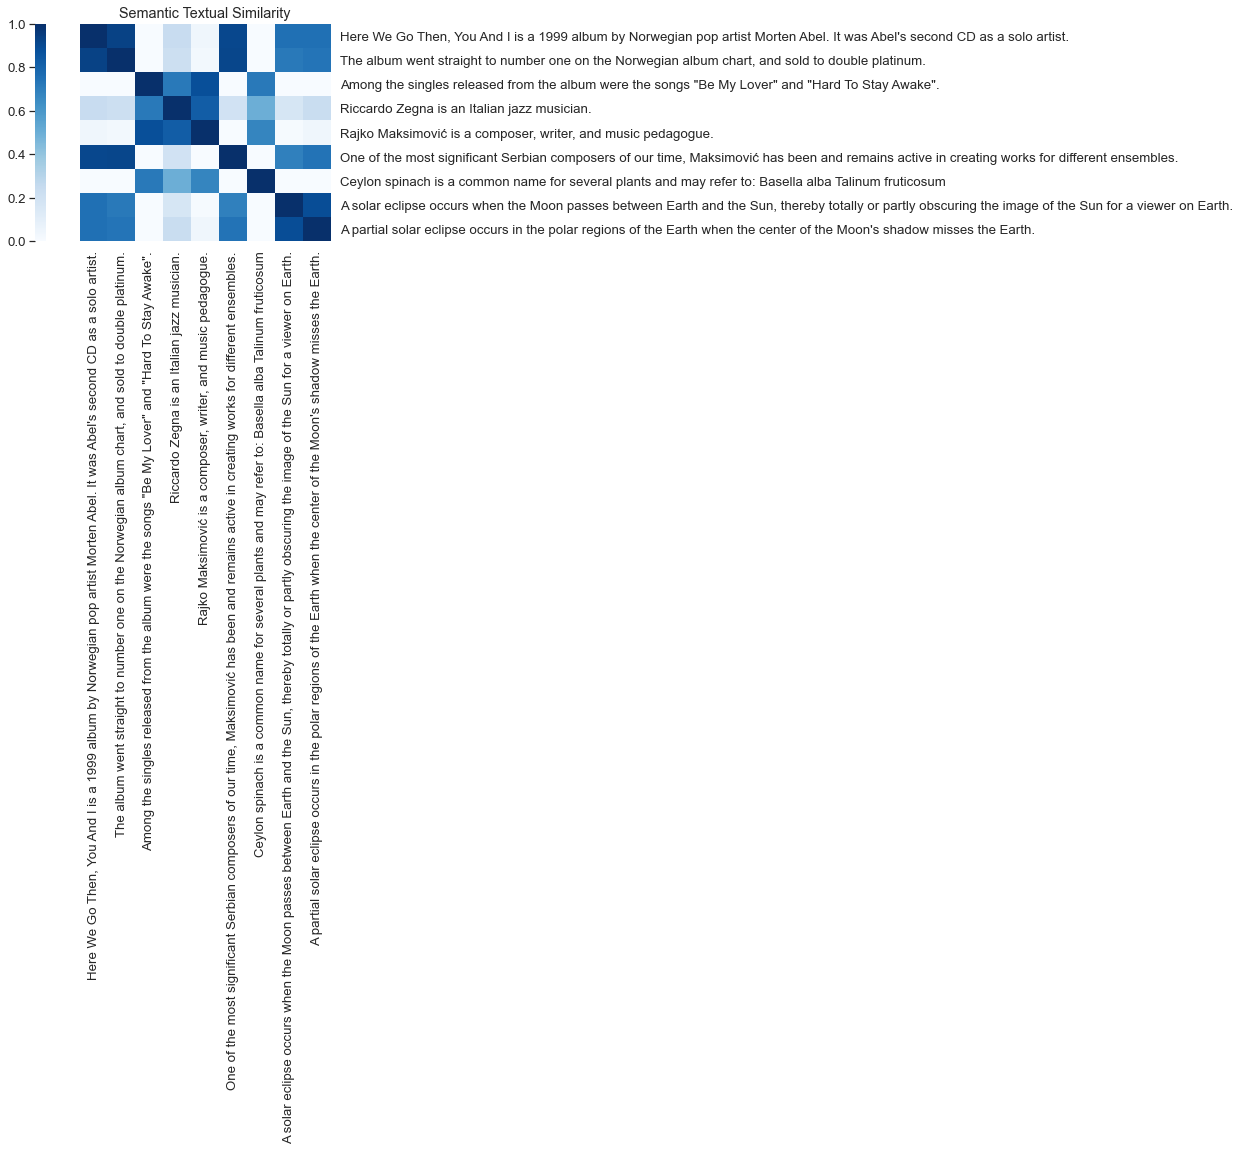

In [8]:
plot_similarity(outputs["pooled_output"], sentences)